In [47]:
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.ensemble import BaggingClassifier
import matplotlib.pyplot as plt

In [11]:
data = datasets.load_wine(as_frame=True)

X = data.data
y = data.target

In [15]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=22)

In [19]:
d_tree = DecisionTreeClassifier()
d_tree.fit(X_train, y_train)

DecisionTreeClassifier()

In [21]:
y_hat = d_tree.predict(X_test)

print("Train data accuracy:",accuracy_score(y_true = y_train, y_pred = d_tree.predict(X_train)))
print("Test data accuracy:",accuracy_score(y_true = y_test, y_pred = y_hat))

Train data accuracy: 1.0
Test data accuracy: 0.8


In [24]:
estimator_range = [2,4,6,8,10,12,14,16]

models = []
scores = []

for estimator in estimator_range:
    bagging = BaggingClassifier(n_estimators=estimator, random_state=22)
    bagging.fit(X_train, y_train)

    models.append(bagging)
    scores.append(accuracy_score(y_true=y_test, y_pred=bagging.predict(X_test)))


In [26]:
scores

[0.8222222222222222,
 0.8666666666666667,
 0.9333333333333333,
 0.9333333333333333,
 0.9555555555555556,
 0.9555555555555556,
 0.9555555555555556,
 0.9333333333333333]

In [27]:
models

[BaggingClassifier(n_estimators=2, random_state=22),
 BaggingClassifier(n_estimators=4, random_state=22),
 BaggingClassifier(n_estimators=6, random_state=22),
 BaggingClassifier(n_estimators=8, random_state=22),
 BaggingClassifier(random_state=22),
 BaggingClassifier(n_estimators=12, random_state=22),
 BaggingClassifier(n_estimators=14, random_state=22),
 BaggingClassifier(n_estimators=16, random_state=22)]

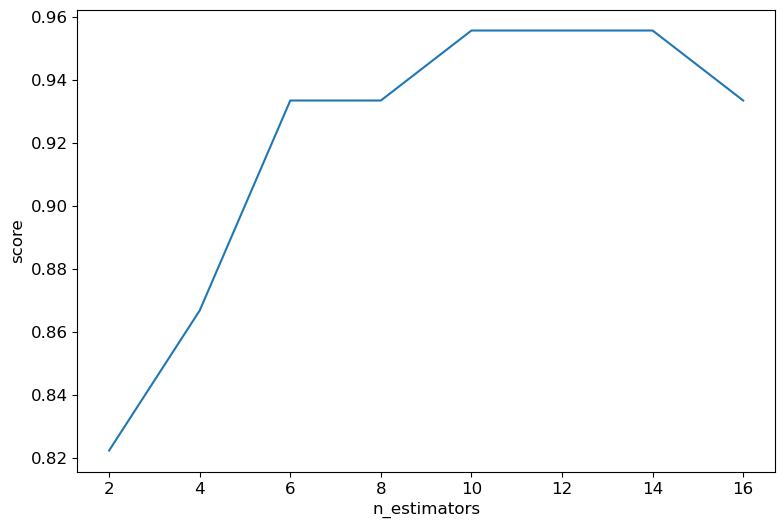

In [41]:
plt.figure(figsize = (9,6))
plt.plot(estimator_range, scores)

plt.xlabel("n_estimators", fontsize = 12)
plt.ylabel("score", fontsize = 12)
plt.tick_params(labelsize=12)

[Text(0.4583333333333333, 0.875, 'proline <= 727.5\ngini = 0.611\nsamples = 82\nvalue = [54, 60, 19]'),
 Text(0.25, 0.625, 'flavanoids <= 1.335\ngini = 0.339\nsamples = 47\nvalue = [0, 58, 16]'),
 Text(0.35416666666666663, 0.75, 'True  '),
 Text(0.16666666666666666, 0.375, 'hue <= 0.92\ngini = 0.266\nsamples = 15\nvalue = [0, 3, 16]'),
 Text(0.08333333333333333, 0.125, 'gini = 0.0\nsamples = 13\nvalue = [0, 0, 16]'),
 Text(0.25, 0.125, 'gini = 0.0\nsamples = 2\nvalue = [0, 3, 0]'),
 Text(0.3333333333333333, 0.375, 'gini = 0.0\nsamples = 32\nvalue = [0, 55, 0]'),
 Text(0.6666666666666666, 0.625, 'flavanoids <= 1.605\ngini = 0.159\nsamples = 35\nvalue = [54, 2, 3]'),
 Text(0.5625, 0.75, '  False'),
 Text(0.5, 0.375, 'color_intensity <= 4.325\ngini = 0.375\nsamples = 3\nvalue = [0, 1, 3]'),
 Text(0.4166666666666667, 0.125, 'gini = 0.0\nsamples = 1\nvalue = [0, 1, 0]'),
 Text(0.5833333333333334, 0.125, 'gini = 0.0\nsamples = 2\nvalue = [0, 0, 3]'),
 Text(0.8333333333333334, 0.375, 'magnesi

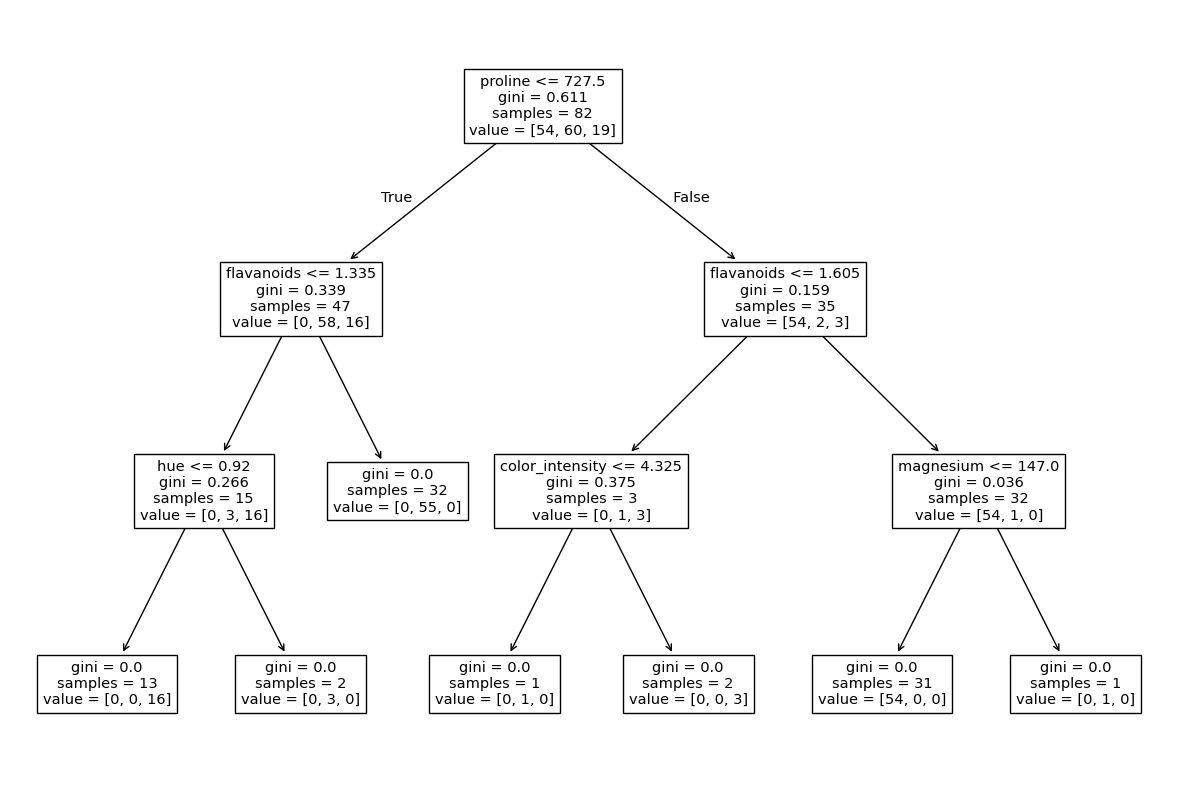

In [52]:
# checking OOB(out-of-bag) subsets
bagging = BaggingClassifier(n_estimators=12, oob_score=True, random_state=22)
bagging.fit(X_train, y_train)

plt.figure(figsize = (15,10))
plot_tree(bagging.estimators_[0], feature_names=X.columns)